In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import gc

## Configuration

In [2]:
# Path where the data is stored
SOURCE_PATH = '../../../data'
# Directory inside SOURCE_PATH where the original data is stored
ORIGINAL_DATA_DIR = '/EXOSAFE'

# Number of force cells in the robotic leg
N_CELLS = 8

# Experiment params
DATE_EXPERIMENTS = '24022021'
N_EXPERIMENTS = 15


## Visualization

In [3]:
# Experiment id to visualize
n_exp = 1

# Load all the experiment data
data_dict = pd.read_excel(SOURCE_PATH + ORIGINAL_DATA_DIR + '/' + DATE_EXPERIMENTS + '/0{}-'.format(n_exp) + DATE_EXPERIMENTS + '.xlsx', sheet_name=None)
data_dict

{'RawForces':               F1x       F1y        F1z       F2x        F2y        F2z  \
 0      -18.404492  1.898629  21.841906  16.09786 -10.165932  11.548734   
 1      -18.404492  1.898629  21.841906  16.09786 -10.165932  11.548734   
 2      -18.404492  1.898629  21.841906  16.09786 -10.165932  11.548734   
 3      -18.449836  1.909491  21.860461  16.13200 -10.242064  11.479956   
 4      -18.449836  1.909491  21.860461  16.13200 -10.242064  11.479956   
 ...           ...       ...        ...       ...        ...        ...   
 186356 -19.084652  2.267937  20.498524  14.46483  -3.961174  12.989251   
 186357 -19.084652  2.267937  20.498524  14.46483  -3.961174  12.989251   
 186358 -19.084652  2.267937  20.498524  14.46483  -3.961174  12.989251   
 186359 -19.084652  2.267937  20.498524  14.46483  -3.961174  12.989251   
 186360 -19.084652  2.267937  20.498524  14.46483  -3.961174  12.989251   
 
               F3x      F3y         F3z        F4x  ...        F5z       F6x  \
 0   

In [4]:
# Select only the relevant excel sheets 
sheets = ['ForceCells', 'H3processed', 'Leg-Replica']

forces_df = data_dict[sheets[0]]
exo_df = data_dict[sheets[1]]
leg_df = data_dict[sheets[2]]

In [5]:
forces_df.info()

forces_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1x     17954 non-null  float64
 1   F1y     17954 non-null  float64
 2   F1z     17954 non-null  float64
 3   F2x     17954 non-null  float64
 4   F2y     17954 non-null  float64
 5   F2z     17954 non-null  float64
 6   F3x     17954 non-null  float64
 7   F3y     17954 non-null  float64
 8   F3z     17954 non-null  float64
 9   F4x     17954 non-null  float64
 10  F4y     17954 non-null  float64
 11  F4z     17954 non-null  float64
 12  F5x     17954 non-null  float64
 13  F5y     17954 non-null  float64
 14  F5z     17954 non-null  float64
 15  F6x     17954 non-null  float64
 16  F6y     17954 non-null  float64
 17  F6z     17954 non-null  float64
 18  F7x     17954 non-null  float64
 19  F7y     17954 non-null  float64
 20  F7z     17954 non-null  float64
 21  F8x     17954 non-null  float64
 22

F1x           F1y           F1z           F2x           F2y  \
count  17954.000000  17954.000000  17954.000000  17954.000000  17954.000000   
mean     -21.982007      1.225685     27.670715     16.319845     -5.529088   
std        3.720171      7.287132      7.736555      2.804444      4.809067   
min      -35.856264    -26.022142     12.349168      8.894320    -23.924072   
25%      -24.678968      1.817164     22.331758     15.045210     -9.480744   
50%      -20.643352      3.413878     26.493645     16.740830     -5.271732   
75%      -19.186676      4.923696     31.230736     18.453520     -1.530388   
max      -14.198836     13.113644     56.695618     26.635740      5.049592   

                F2z           F3x           F3y           F3z           F4x  \
count  17954.000000  17954.000000  17954.000000  17954.000000  17954.000000   
mean      13.401636     10.421909    -87.847903     88.203296      7.641452   
std        2.527680     25.112960     13.594273     16.818369      9.971728   
min        7.250109    -48.703748   -132.771200     39.240960    -31.431680   
25%       11.381565     -7.713850    -96.427200     78.829968      3.000752   
50%       13.241437     10.448394    -84.780600     92.480480      8.858952   
75%       15.129011     27.848402    -78.337800    100.226704     14.786072   
max       22.511183     69.994796    -50.537000    128.562240     26.723016   

       ...           F5z           F6x           F6y           F6z  \
count  ...  17954.000000  17954.000000  17954.000000  17954.000000   
mean   ...     61.405294     -7.624368     -7.073778     26.118209   
std    ...     11.834215      6.037869      2.851265      7.415149   
min    ...     24.805307    -29.039060    -14.032612      9.249959   
25%    ...     54.366549    -10.833600     -9.208737     21.826947   
50%    ...     64.062798     -6.089320     -7.317778     24.513708   
75%    ...     69.457876     -3.162728     -5.492975     28.363569   
max    ...     89.413874      2.033116      8.261960     54.475164   

                F7x           F7y           F7z           F8x           F8y  \
count  17954.000000  17954.000000  17954.000000  17954.000000  17954.000000   
mean     -50.097008     -9.915911    -21.077856     -5.655186     28.385054   
std       28.161758      3.841548     15.671547     13.113538      8.002448   
min      -91.802522    -17.263500    -54.122057    -29.744000     -3.419828   
25%      -69.343214    -12.705400    -30.866039    -13.124336     25.759668   
50%      -58.753451    -10.498320    -22.985369     -8.563559     29.416216   
75%      -34.229430     -7.511565     -9.749060      1.032646     32.817656   
max       29.104385      3.331915     27.418753     43.861300     44.394700   

                F8z  
count  17954.000000  
mean      56.060793  
std       11.322895  
min       41.077600  
25%       50.357600  
50%       52.328800  
75%       55.372000  
max       98.575200  

[8 rows x 24 columns]

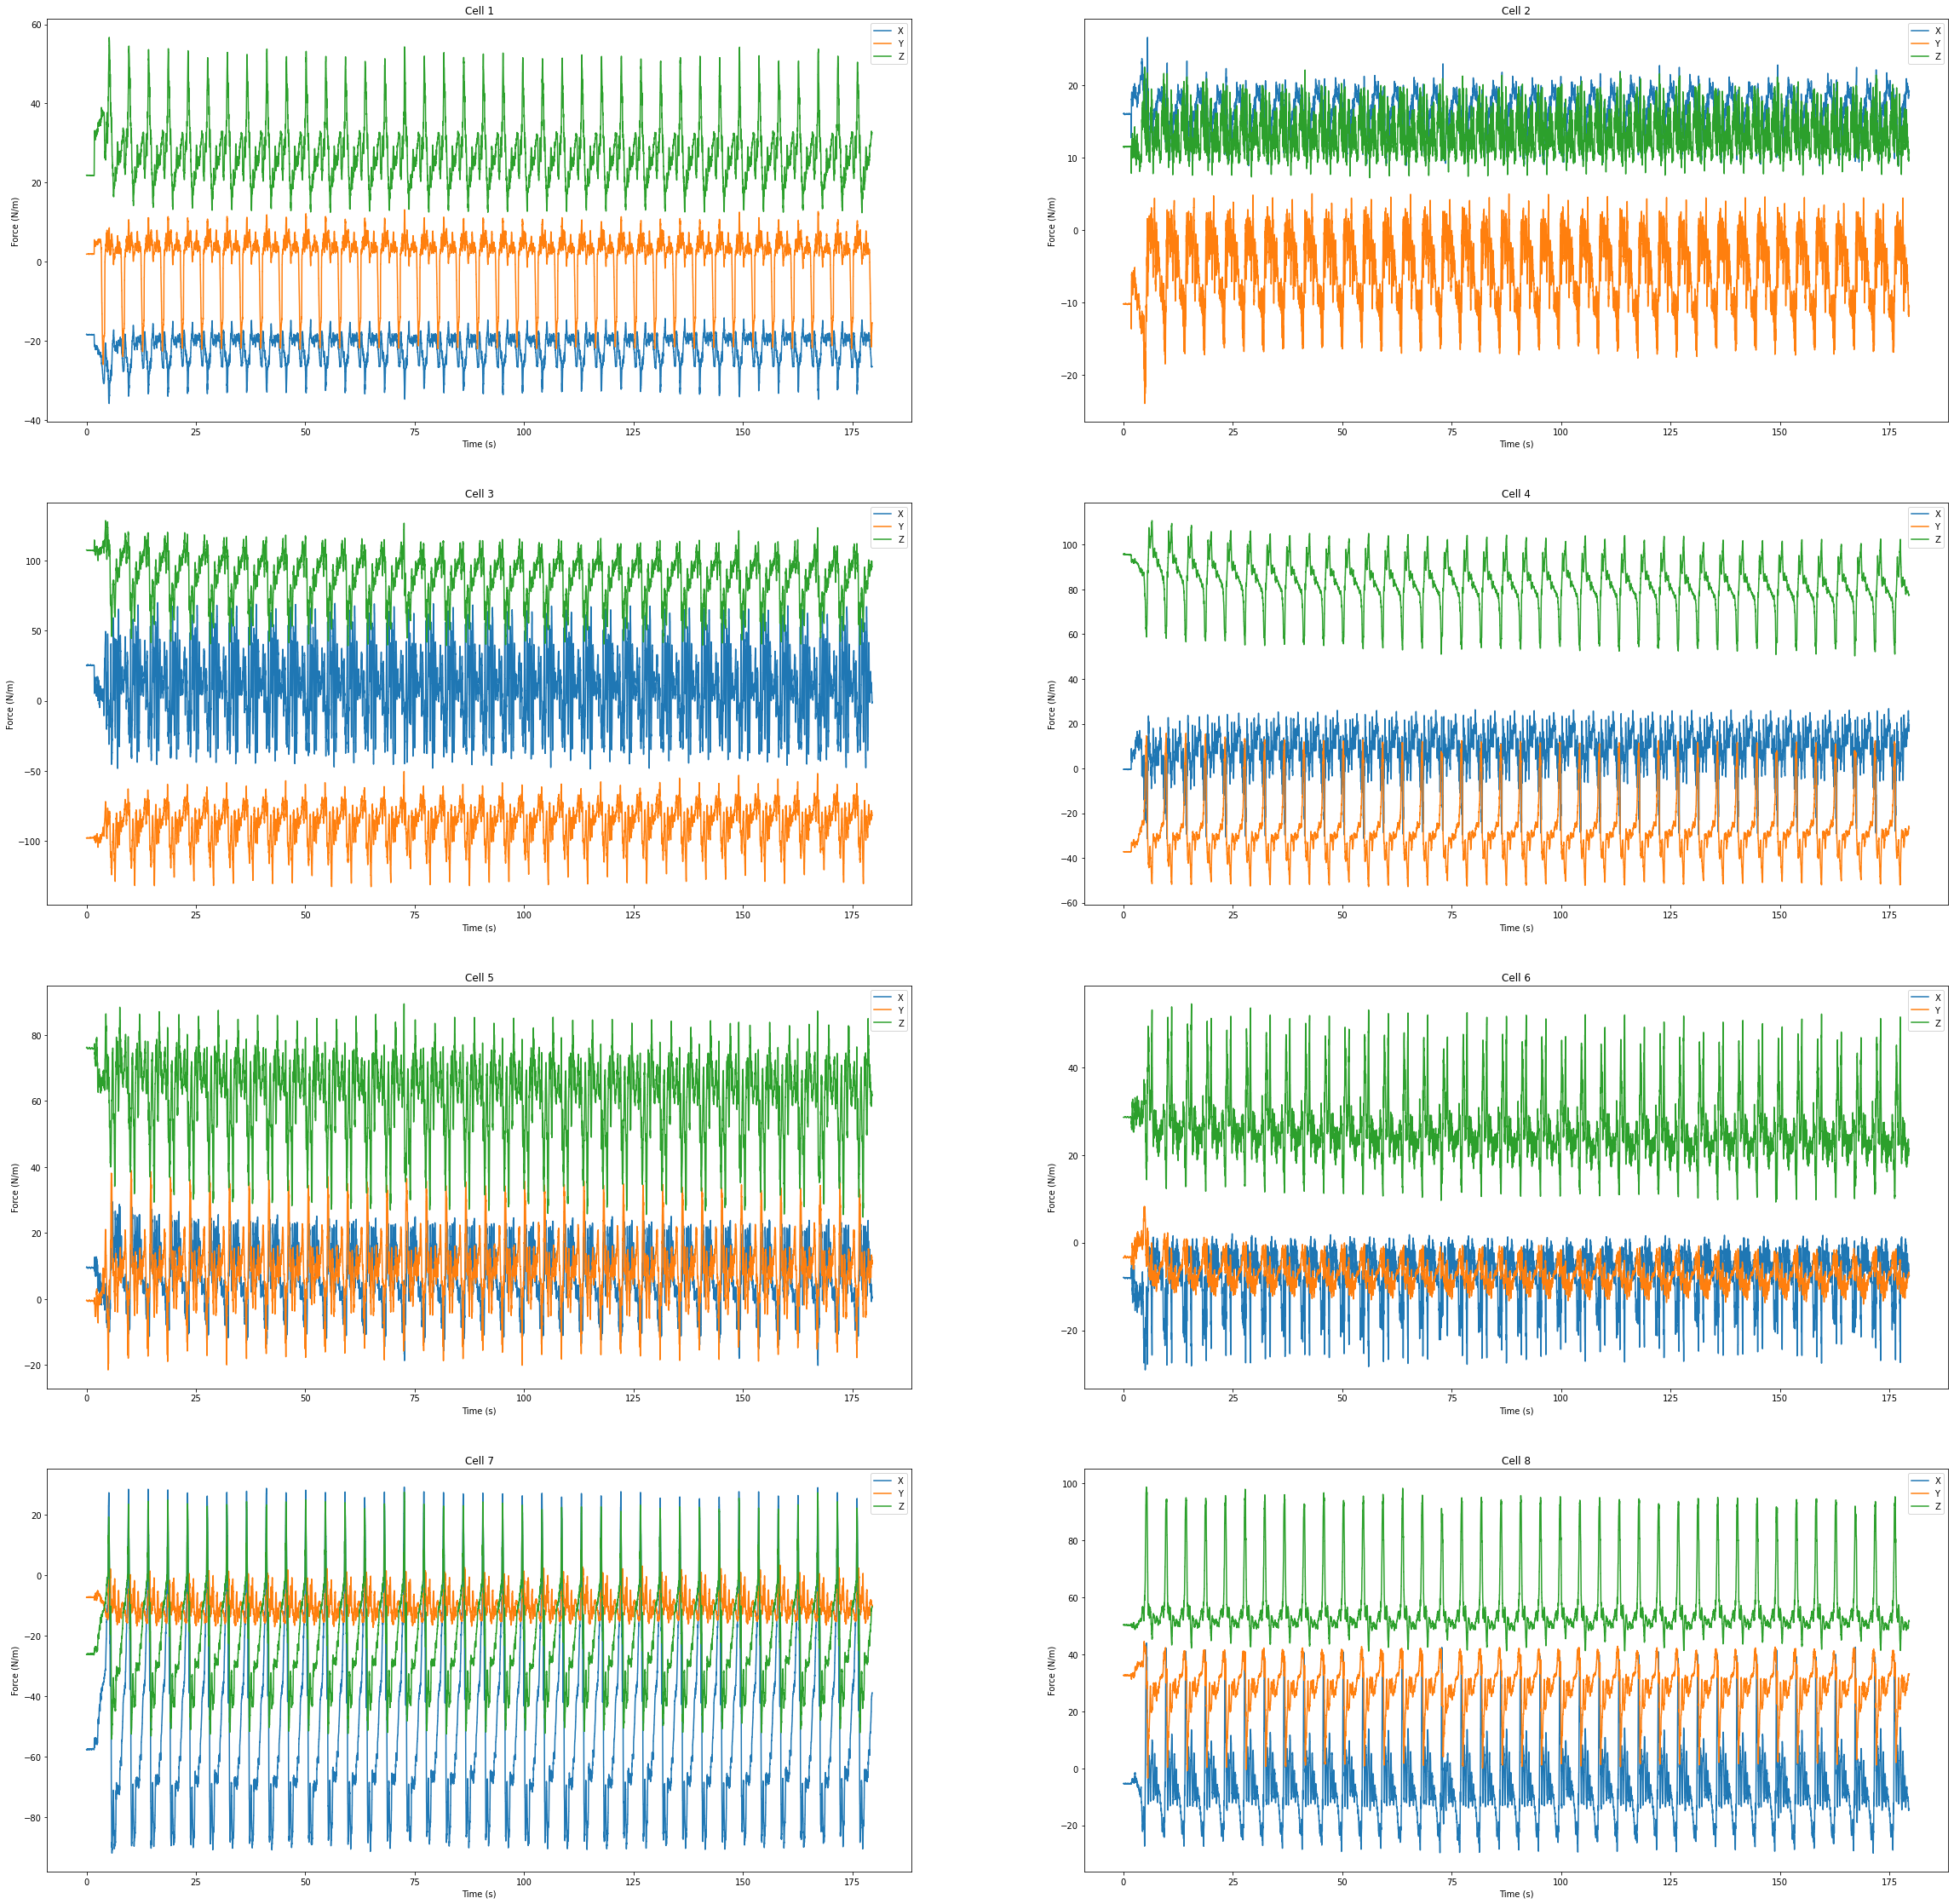

In [6]:
# Add the time of each measure (for visualization purposes only)
forces_df['Time'] = [i / 100 for i in range(1, len(forces_df) + 1)]

# Plot the evolution of the forces
plt.figure(figsize=(40,40))
for i in range (1, N_CELLS + 1):
    plt.subplot(4, 2, i)
    plt.plot(forces_df['Time'], forces_df['F{}x'.format(str(i))], label='X')
    plt.plot(forces_df['Time'], forces_df['F{}y'.format(str(i))], label='Y')
    plt.plot(forces_df['Time'], forces_df['F{}z'.format(str(i))], label='Z')
    plt.legend()
    plt.title('Cell {}'.format(str(i)))
    plt.xlabel('Time (s)')
    plt.ylabel('Force (N/m)')

plt.show()

In [7]:
exo_df.info()

exo_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LHipPos       17954 non-null  float64
 1   LKneePos      17954 non-null  float64
 2   LAnklePos     17954 non-null  float64
 3   LHipVel       17953 non-null  float64
 4   LKneeVel      17953 non-null  float64
 5   LAnkleVel     17953 non-null  float64
 6   LHipAcc       17952 non-null  float64
 7   LKneeAcc      17952 non-null  float64
 8   LAnkleAcc     17952 non-null  float64
 9   RHipPos       17954 non-null  float64
 10  RKneePos      17954 non-null  float64
 11  RAnklePos     17954 non-null  float64
 12  LHipTorque    17954 non-null  float64
 13  LKneeTorque   17954 non-null  float64
 14  LankleTorque  17954 non-null  float64
 15  RHipTorque    17954 non-null  float64
 16  RKneeTorque   17954 non-null  float64
 17  RankleTorque  17954 non-null  float64
dtypes: float64(18)
memory usag

LHipPos      LKneePos     LAnklePos       LHipVel      LKneeVel  \
count  17954.000000  17954.000000  17954.000000  17953.000000  17953.000000   
mean       5.893050     11.280529      7.297475     -0.063157      0.072132   
std       13.443032     15.774772      7.433567     19.767381     36.862658   
min      -11.735752     -0.003945     -9.871382    -22.281512   -102.548250   
25%       -7.523706      0.070255      3.020496    -17.167306     -6.276083   
50%        3.962354      4.136773      6.634481     -6.736897      0.004837   
75%       18.436475     15.457590     12.387269     17.759174     11.642769   
max       28.131114     53.897785     19.514101     39.003584     71.262505   

          LAnkleVel       LHipAcc      LKneeAcc     LAnkleAcc       RHipPos  \
count  17953.000000  17952.000000  17952.000000  17952.000000  17954.000000   
mean       0.016888      0.017069      0.133286     -0.176405      6.331022   
std       19.491017     38.377004    148.708236     78.272230     13.259786   
min      -45.937004    -90.164022   -628.284186   -126.327757    -11.945596   
25%       -6.594417    -15.301505      0.078180    -46.434574     -6.387410   
50%        3.707370      6.250783      9.812781    -13.709318      4.643986   
75%       11.878176     21.648544     37.725224     25.559623     18.535076   
max       40.600405     95.189629    352.316402    271.693547     28.169717   

           RKneePos     RAnklePos    LHipTorque   LKneeTorque  LankleTorque  \
count  17954.000000  17954.000000  17954.000000  17954.000000  17954.000000   
mean      12.273753      7.303304      1.085869      6.837515     -1.096026   
std       17.366906      7.682057     14.713423      8.089608      1.293533   
min        0.000000    -10.594921    -28.520098    -10.612005     -3.710193   
25%        0.017688      2.807053     -9.991668      0.231203     -2.572493   
50%        3.396153      6.991456     -0.810403      5.334159     -0.048550   
75%       17.480171     12.597982      8.061008     12.858639     -0.000338   
max       57.219701     19.689745     45.826084     26.378326     -0.000004   

         RHipTorque   RKneeTorque  RankleTorque  
count  17954.000000  17954.000000  17954.000000  
mean      -1.403335      1.001717      0.081207  
std       12.051409      3.780350      8.952479  
min      -31.095124     -7.473555    -52.337663  
25%       -9.751058     -1.521308      2.000255  
50%       -0.349954      0.382366      2.032464  
75%        6.022009      3.611217      2.458585  
max       21.180639     11.077435      2.999993

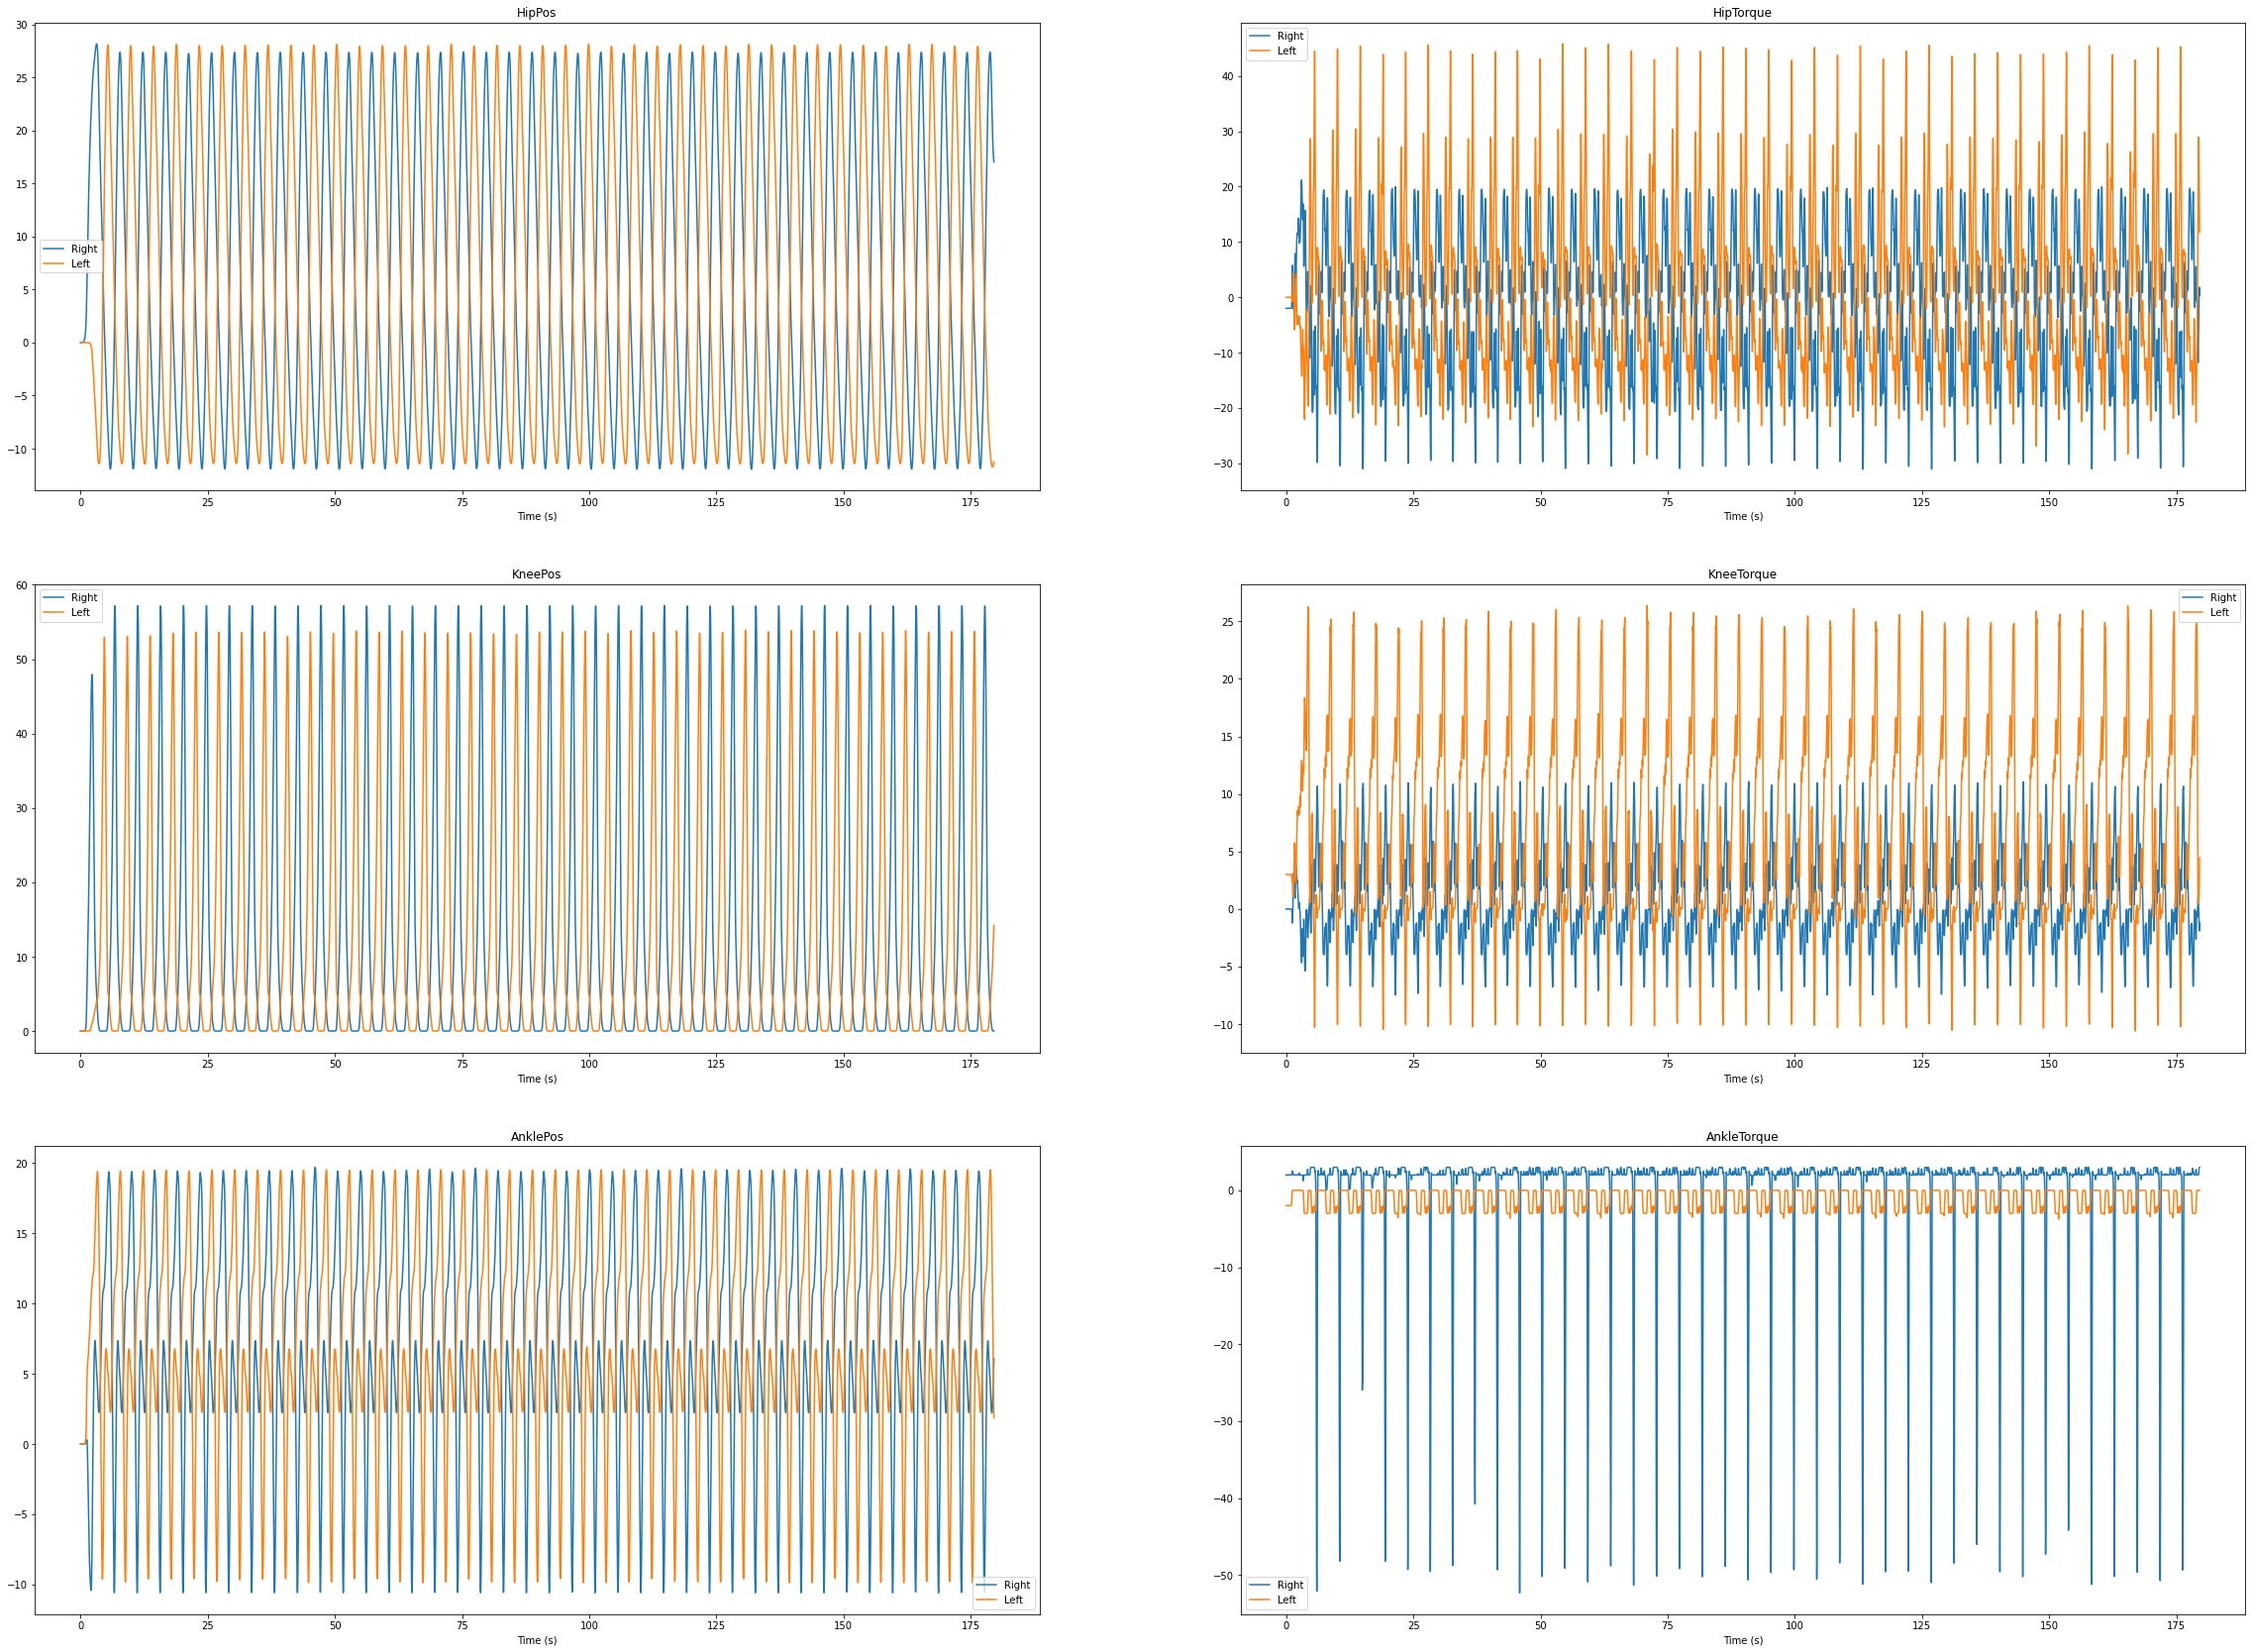

In [8]:
# Rename columns to manage with some typos
exo_df = exo_df.rename(columns={'LankleTorque': 'LAnkleTorque', 'RankleTorque': 'RAnkleTorque'})

# Add the time of each measure (for visualization purposes only)
exo_df['Time'] = [i / 100 for i in range(1, len(exo_df) + 1)]

# Plot the evolution of the exo data
plt.figure(figsize=(40,40))
plot_id = 1
for a in ['Hip', 'Knee', 'Ankle']:
    for m in ['Pos', 'Torque']:
        plt.subplot(4, 2, plot_id)
        plt.plot(exo_df['Time'], exo_df['R' + a + m], label='Right')
        plt.plot(exo_df['Time'], exo_df['L' + a + m], label='Left')
        plt.legend()
        plt.title(a + m)
        plt.xlabel('Time (s)')
        plt.ylabel('')
        plot_id += 1
        
plt.show()

In [9]:
leg_df.info()

leg_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18637 entries, 0 to 18636
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LegKneePosition          18637 non-null  float64
 1   LegKneeVelocity          18637 non-null  float64
 2   LegKneeTorque            18637 non-null  float64
 3   LegKneePositionFiltered  18637 non-null  float64
 4   LegKneeVelocityFiltered  18637 non-null  float64
 5   LegKneeTorqueFiltered    18637 non-null  float64
dtypes: float64(6)
memory usage: 873.7 KB


LegKneePosition  LegKneeVelocity  LegKneeTorque  \
count     18637.000000     18637.000000   18637.000000   
mean         10.681093        -0.371109     -13.695741   
std          15.085138        44.597310       3.138232   
min          -0.034243      -104.770000     -26.324420   
25%           1.547885       -10.220000     -14.666612   
50%           3.239883        -0.610000     -12.356153   
75%          11.721846         1.250000     -11.474292   
max          53.802051       172.990000     -11.072505   

       LegKneePositionFiltered  LegKneeVelocityFiltered  LegKneeTorqueFiltered  
count             18637.000000             18637.000000           18637.000000  
mean                 10.715789                -0.358604             -13.691823  
std                  15.076746                44.459700               3.129109  
min                   0.515107              -103.323283             -25.807999  
25%                   1.488319               -10.173392             -14.682031  
50%                   3.302237                -0.464971             -12.360391  
75%                  11.781784                 1.247279             -11.471337  
max                  53.493967               170.720535             -11.112289

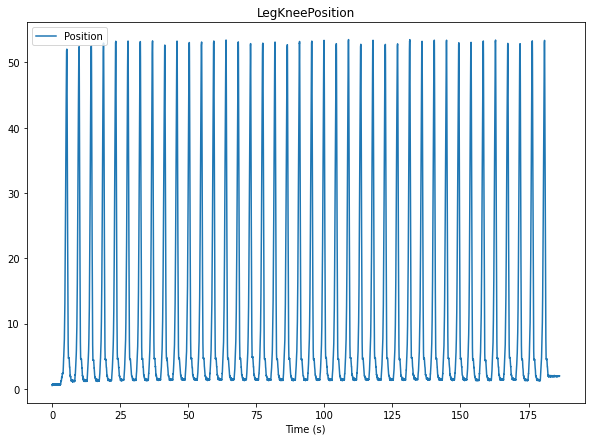

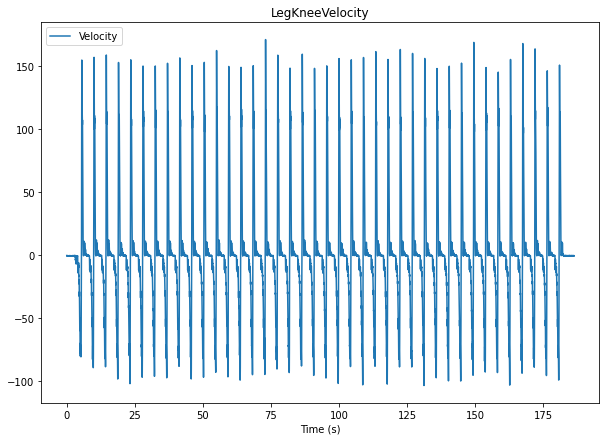

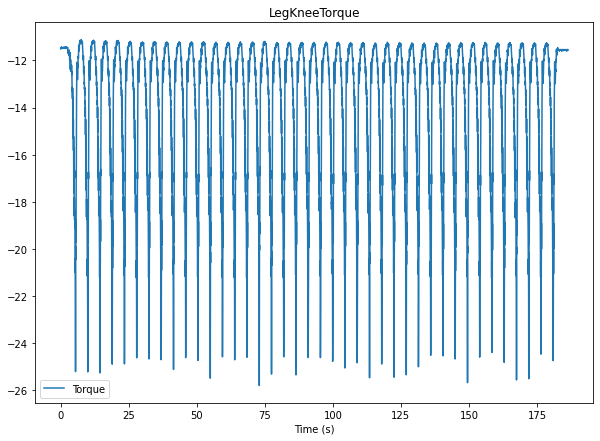

In [10]:
# Add the time of each measure (for visualization purposes only)
leg_df['Time'] = [i / 100 for i in range(1, len(leg_df) + 1)]

# Plot the evolution of the leg data
for m in ['Position', 'Velocity', 'Torque']:
    plt.figure(figsize=(10,7))
    plt.plot(leg_df['Time'], leg_df['LegKnee' + m + 'Filtered'], label=m)
    plt.legend()
    plt.title('LegKnee' + m)
    plt.xlabel('Time (s)')
    plt.ylabel('')
    plt.show()

In [11]:
# Comment the following lines if you experiment problems with the visualization of the interactive plots
%matplotlib widget
# %matplotlib inline

In [12]:
# Plot the position of the exo knee joint vs the robotic leg knee joint

plt.figure(figsize=(10,7))
plt.plot(exo_df['Time'], exo_df['LKneePos'], label='Exo')
plt.plot(leg_df['Time'], leg_df['LegKneePositionFiltered'], label='Robotic leg')
plt.legend()
plt.title('Exo Knee joint vs Leg Knee joint (position)')
plt.xlabel('Time (s)')
plt.ylabel('')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
# Plot the velocity of the exo knee joint vs the robotic leg knee joint

plt.figure(figsize=(10,7))
plt.plot(exo_df['Time'], exo_df['LKneeVel'], label='Exo')
plt.plot(leg_df['Time'], leg_df['LegKneeVelocityFiltered'], label='Robotic leg')
plt.legend()
plt.title('Exo Knee joint vs Leg Knee joint (velocity)')
plt.xlabel('Time (s)')
plt.ylabel('')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
# Plot the torque of the exo knee joint vs the robotic leg knee joint

plt.figure(figsize=(10,7))
plt.plot(exo_df['Time'], exo_df['LKneeTorque'], label='Exo')
plt.plot(leg_df['Time'], leg_df['LegKneeTorqueFiltered'], label='Robotic leg')
plt.legend()
plt.title('Exo Knee joint vs Leg Knee joint (torque)')
plt.xlabel('Time (s)')
plt.ylabel('')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …